In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pprint
import sys
import pathlib
parent_path = pathlib.Path.cwd().parent
sys.path.append(str(parent_path))
import socket
import time

from simpleByteProtocol import simpleRecv, simpleSend
from util import MESSAGE_TYPE, pprintResult
import krr
import oue
import olh

In [2]:
sns.set()

## DecideSharedParameters

- 大体カテゴリ数の50倍~100倍くらいあれば近似精度は十分そう
- イプシロンが小さいと近似精度が低い傾向

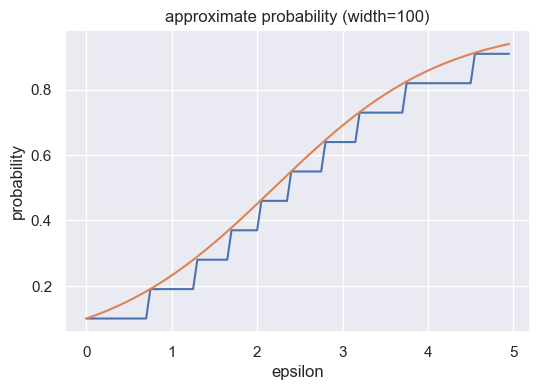

In [3]:
epsilon = 5
width = 100
cate_num = 10
categories = list(range(0, cate_num))

data = {'epsilon': [], 'probability': []}
correct_data = {'epsilon': [], 'probability': []}

for i in range(0, 100):
    eps = epsilon * i / 100
    d, l, n, z = krr.buildKrrParams(eps, width, categories)
    data['epsilon'].append(eps)
    data['probability'].append(l/n)
    ratio = np.exp(eps) / ((d-1) + np.exp(eps))
    correct_data['epsilon'].append(eps)
    correct_data['probability'].append(ratio)

fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(1, 1, 1) 

sns.lineplot(x="epsilon", y="probability", data=data, ax=ax1)
sns.lineplot(x="epsilon", y="probability", data=correct_data, ax=ax1)
ax1.set_title('approximate probability (width=%d)'% width)
plt.show()

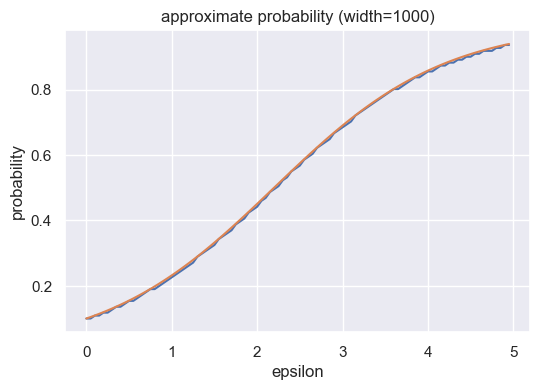

In [4]:
epsilon = 5
width = 1000
cate_num = 10
categories = list(range(0, cate_num))

data = {'epsilon': [], 'probability': []}
correct_data = {'epsilon': [], 'probability': []}

for i in range(0, 100):
    eps = epsilon * i / 100
    d, l, n, z = krr.buildKrrParams(eps, width, categories)
    data['epsilon'].append(eps)
    data['probability'].append(l/n)
    ratio = np.exp(eps) / ((d-1) + np.exp(eps))
    correct_data['epsilon'].append(eps)
    correct_data['probability'].append(ratio)

fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(1, 1, 1) 

sns.lineplot(x="epsilon", y="probability", data=data, ax=ax1)
sns.lineplot(x="epsilon", y="probability", data=correct_data, ax=ax1)
ax1.set_title('approximate probability (width=%d)'% width)
plt.show()

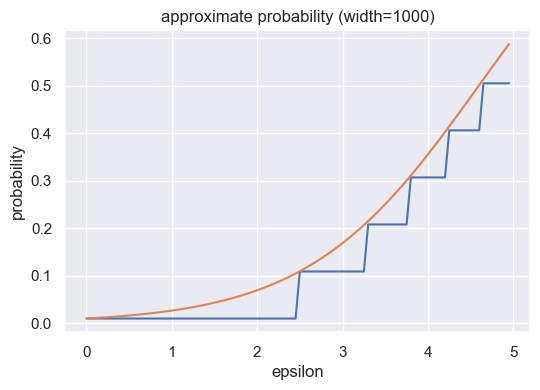

In [5]:
epsilon = 5
width = 1000
cate_num = 100
categories = list(range(0, cate_num))

data = {'epsilon': [], 'probability': []}
correct_data = {'epsilon': [], 'probability': []}

for i in range(0, 100):
    eps = epsilon * i / 100
    d, l, n, z = krr.buildKrrParams(eps, width, categories)
    data['epsilon'].append(eps)
    data['probability'].append(l/n)
    ratio = np.exp(eps) / ((d-1) + np.exp(eps))
    correct_data['epsilon'].append(eps)
    correct_data['probability'].append(ratio)

fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(1, 1, 1) 

sns.lineplot(x="epsilon", y="probability", data=data, ax=ax1)
sns.lineplot(x="epsilon", y="probability", data=correct_data, ax=ax1)
ax1.set_title('approximate probability (width=%d)'% width)
plt.show()

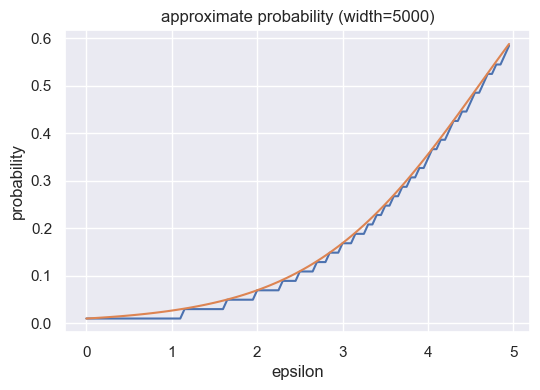

In [6]:
epsilon = 5
width = 5000
cate_num = 100
categories = list(range(0, cate_num))

data = {'epsilon': [], 'probability': []}
correct_data = {'epsilon': [], 'probability': []}

for i in range(0, 100):
    eps = epsilon * i / 100
    d, l, n, z = krr.buildKrrParams(eps, width, categories)
    data['epsilon'].append(eps)
    data['probability'].append(l/n)
    ratio = np.exp(eps) / ((d-1) + np.exp(eps))
    correct_data['epsilon'].append(eps)
    correct_data['probability'].append(ratio)

fig = plt.figure(dpi=100)
ax1 = fig.add_subplot(1, 1, 1) 

sns.lineplot(x="epsilon", y="probability", data=data, ax=ax1)
sns.lineplot(x="epsilon", y="probability", data=correct_data, ax=ax1)
ax1.set_title('approximate probability (width=%d)'% width)
plt.show()

## Methods KRR, OUE, OLH

In [7]:
epsilon = 1.0
width = 100
cate_num = 10
categories = list(range(0, cate_num))
secret_input = 2

krr.runOnMemory(categories, epsilon, secret_input, width)

secret input:  2
sigma:  2
secret output:  7 g^{mu_sigma}:  139779622282704585818777690020698886173133261723
####### P1 verification #######
OK.
####### P2 verification #######
OK.
{'type': <MESSAGE_TYPE.OK: 6>}
+-----------------------------+-----------------------+
|             name            |         value         |
+-----------------------------+-----------------------+
|        setup time [s]       |  0.009920835494995117 |
| MESSAGE_TYPE.START size [B] |          219          |
|        step2 time [s]       | 0.0026400089263916016 |
| MESSAGE_TYPE.STEP2 size [B] |          2322         |
|        step4 time [s]       |  0.17030596733093262  |
| MESSAGE_TYPE.STEP4 size [B] |           52          |
|         overall time        |   0.4350578784942627  |
+-----------------------------+-----------------------+
+-----------------------------+------------------------+
|             name            |         value          |
+-----------------------------+------------------------+
|

In [8]:
epsilon = 1.0
width = 100
cate_num = 10
categories = list(range(0, cate_num))
secret_input = 2

oue.runOnMemory(categories, epsilon, secret_input, width)

secret input:  2
sigma:  [51, 28, 79, 67, 53, 40, 3, 69, 34, 99]
secret output:  [0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
####### P1 verification #######
OK.
####### P2 verification #######
OK.
{'type': <MESSAGE_TYPE.OK: 6>}
+-----------------------------+----------------------+
|             name            |        value         |
+-----------------------------+----------------------+
|        setup time [s]       | 0.010352849960327148 |
| MESSAGE_TYPE.START size [B] |         851          |
|        step2 time [s]       | 0.01834392547607422  |
| MESSAGE_TYPE.STEP2 size [B] |        22607         |
|        step4 time [s]       | 0.004456043243408203 |
| MESSAGE_TYPE.STEP4 size [B] |          52          |
|         overall time        |  0.7304718494415283  |
+-----------------------------+----------------------+
+-----------------------------+-----------------------+
|             name            |         value         |
+-----------------------------+-----------------------+
|        ste

In [9]:
epsilon = 1.0
width = 100
cate_num = 10
categories = list(range(0, cate_num))
secret_input = 2
g = 5

olh.runOnMemory(categories, epsilon, secret_input, width, g)

approximate p= 0.4
sigma:  4
[Prover] hased secret input:  2 (original:  2 )
secret output (hashed):  2
####### P1 verification #######
OK.
####### P2 verification #######
OK.
{'type': <MESSAGE_TYPE.OK: 6>}
+-----------------------------+-----------------------+
|             name            |         value         |
+-----------------------------+-----------------------+
|        setup time [s]       |  0.07389998435974121  |
| MESSAGE_TYPE.START size [B] |          231          |
|        step2 time [s]       | 0.0009109973907470703 |
| MESSAGE_TYPE.STEP2 size [B] |          552          |
|        step4 time [s]       |  0.018314123153686523 |
| MESSAGE_TYPE.STEP4 size [B] |           52          |
|         overall time        |  0.24893784523010254  |
+-----------------------------+-----------------------+
+-----------------------------+------------------------+
|             name            |         value          |
+-----------------------------+------------------------+
|     